In [155]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid", {'legend.frameon':True})

columns = [
    'id', 'testing_for', 'address', 'zip_code', 'provider',
    'connected_with', 'monthly_price', 'provider_down_speed',
    'provider_price', 'actual_down_speed', 'actual_price', 'rating',
    'completed', 'created_at', 'updated_at', 'latitude', 'longitude',
    'ping', 'actual_upload_speed', 'test_id', 'ip_address', 'hostname',
    'from_mlab', 'area_code', 'test_type', 'census_code',
    'upload_median', 'download_median', 'census_status', 'test_date',
    'country_code', 'region', 'county', 'accuracy', 'location',
    'census_block'
]

# Load and filter CSV in chunks (less memory, require 5GB to load full dataset) to just from_mlab = 0 (SUA submissions)
iter_csv = pd.read_csv('./data/9035f7b8-2d2f-4de0-a816-4067e1ae8fd8.csv', header=None, names=columns, iterator=True, chunksize=1000)
sua = pd.concat([chunk[chunk['from_mlab'] == 0] for chunk in iter_csv])

In [156]:
sua['rating'] = sua['rating'].replace(0.0,  np.nan)

In [157]:
sua.shape

(1094, 36)

In [158]:
sua.describe()

,zip_code,monthly_price,provider_down_speed,provider_price,actual_down_speed,actual_price,rating,completed,latitude,longitude,...,actual_upload_speed,from_mlab,area_code,census_code,upload_median,download_median,county,accuracy,location,census_block
count,1035.000000,574.000000,503.000000,476.000000,1094.000000,476.000000,665.000000,1094.000000,1038.000000,1038.000000,...,1094.000000,1094.0,0.0,1.014000e+03,0.0,0.0,1037.000000,2.710000e+02,0.0,9.340000e+02
mean,95060.711111,75.001742,137.387674,5.558971,57.613272,27.608193,4.213534,0.983547,43.747552,-121.367168,...,27.248729,0.0,NaN,4.054141e+10,NaN,NaN,40057.395371,1.426643e+04,NaN,4.107419e+14
std,10964.223158,38.551907,482.226570,12.475044,83.726532,111.394570,1.951088,0.127269,2.133904,7.974292,...,81.446333,0.0,NaN,4.470706e+09,NaN,NaN,5606.976028,1.176771e+05,NaN,1.555655e+13
min,6473.000000,0.000000,0.000000,0.010000,0.030000,0.040000,1.000000,0.000000,20.907700,-157.992500,...,0.000000,0.0,NaN,6.037462e+09,NaN,NaN,4019.000000,6.000000e+00,NaN,1.601195e+14
25%,97401.000000,50.000000,12.000000,0.540000,7.735000,1.097500,3.000000,1.000000,44.020125,-123.160700,...,1.892500,0.0,NaN,4.103900e+10,NaN,NaN,41039.000000,5.000000e+01,NaN,4.103900e+14
50%,97405.000000,65.000000,60.000000,1.340000,29.595000,3.015000,4.000000,1.000000,44.050000,-123.092700,...,5.820000,0.0,NaN,4.103900e+10,NaN,NaN,41039.000000,5.000000e+01,NaN,4.103900e+14
75%,97448.000000,90.000000,150.000000,4.500000,72.935000,11.022500,6.000000,1.000000,44.088475,-123.021500,...,11.635000,0.0,NaN,4.103900e+10,NaN,NaN,41039.000000,1.062000e+03,NaN,4.103900e+14
max,99352.000000,200.000000,10000.000000,120.000000,828.200000,1428.570000,7.000000,1.000000,47.548000,-72.839700,...,918.310000,0.0,NaN,5.502500e+10,NaN,NaN,55025.000000,1.488703e+06,NaN,5.306301e+14


In [1]:
#print(
sua.groupby('provider').agg({
    "id": ["count"],
    "rating":  ["mean", "median", "count"],
    "actual_down_speed": ["mean", "median", "count"],
    "monthly_price": ["mean", "median", "count"],
    "actual_price": ["mean", "median", "count"]
}).sort_values(('id', 'count'), ascending=False).head(15)
#.to_string())

NameError: name 'sua' is not defined

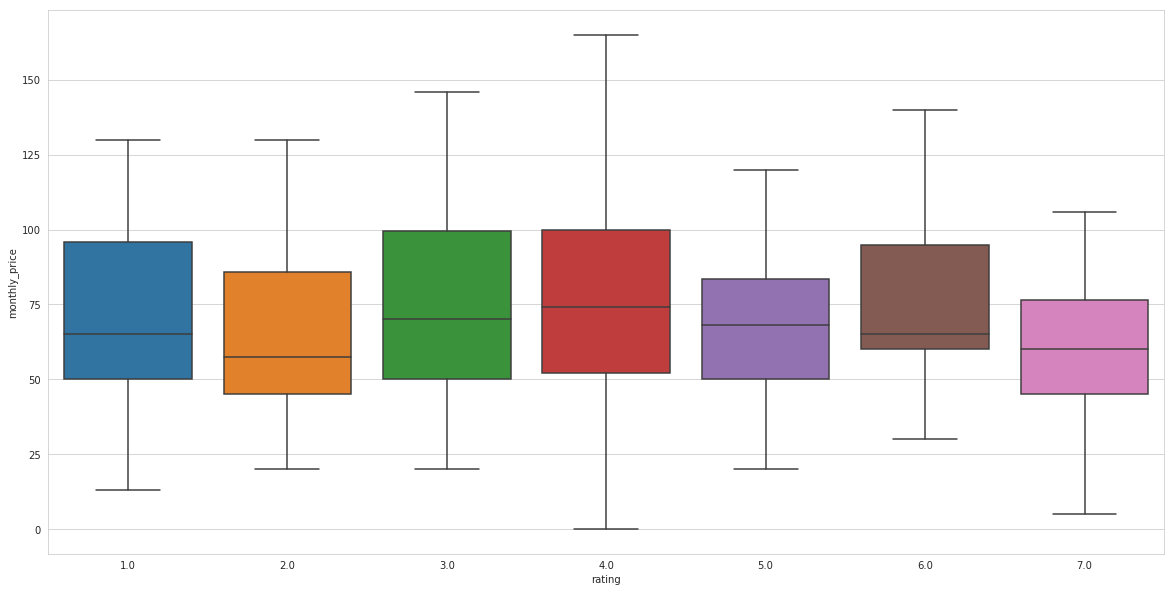

In [160]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='rating', y='monthly_price', data=sua, showfliers=False)

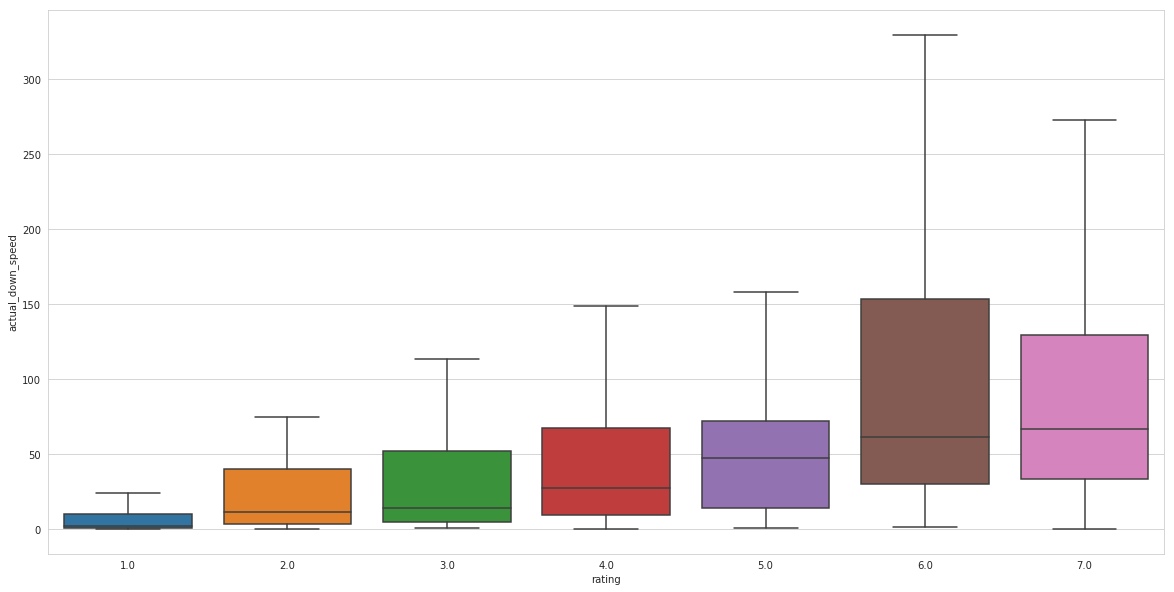

In [161]:
plt.figure(figsize=(20, 10))
#ax = sns.swarmplot(x='rating', y='actual_down_speed', data=sua, color=".25")
ax = sns.boxplot(x='rating', y='actual_down_speed', data=sua,  showfliers=False)

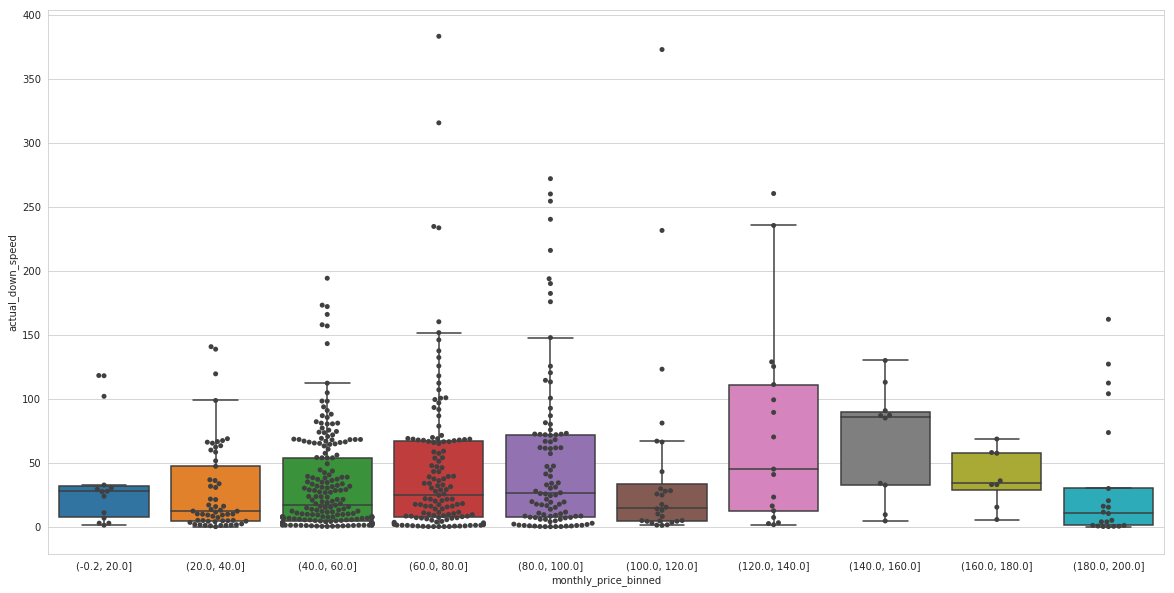

In [162]:
sua['monthly_price_binned'] = pd.cut(sua['monthly_price'], 10)
plt.figure(figsize=(20, 10))
ax = sns.swarmplot(x='monthly_price_binned', y='actual_down_speed', data=sua, color=".25")
ax = sns.boxplot(x='monthly_price_binned', y='actual_down_speed', data=sua, showfliers=False)

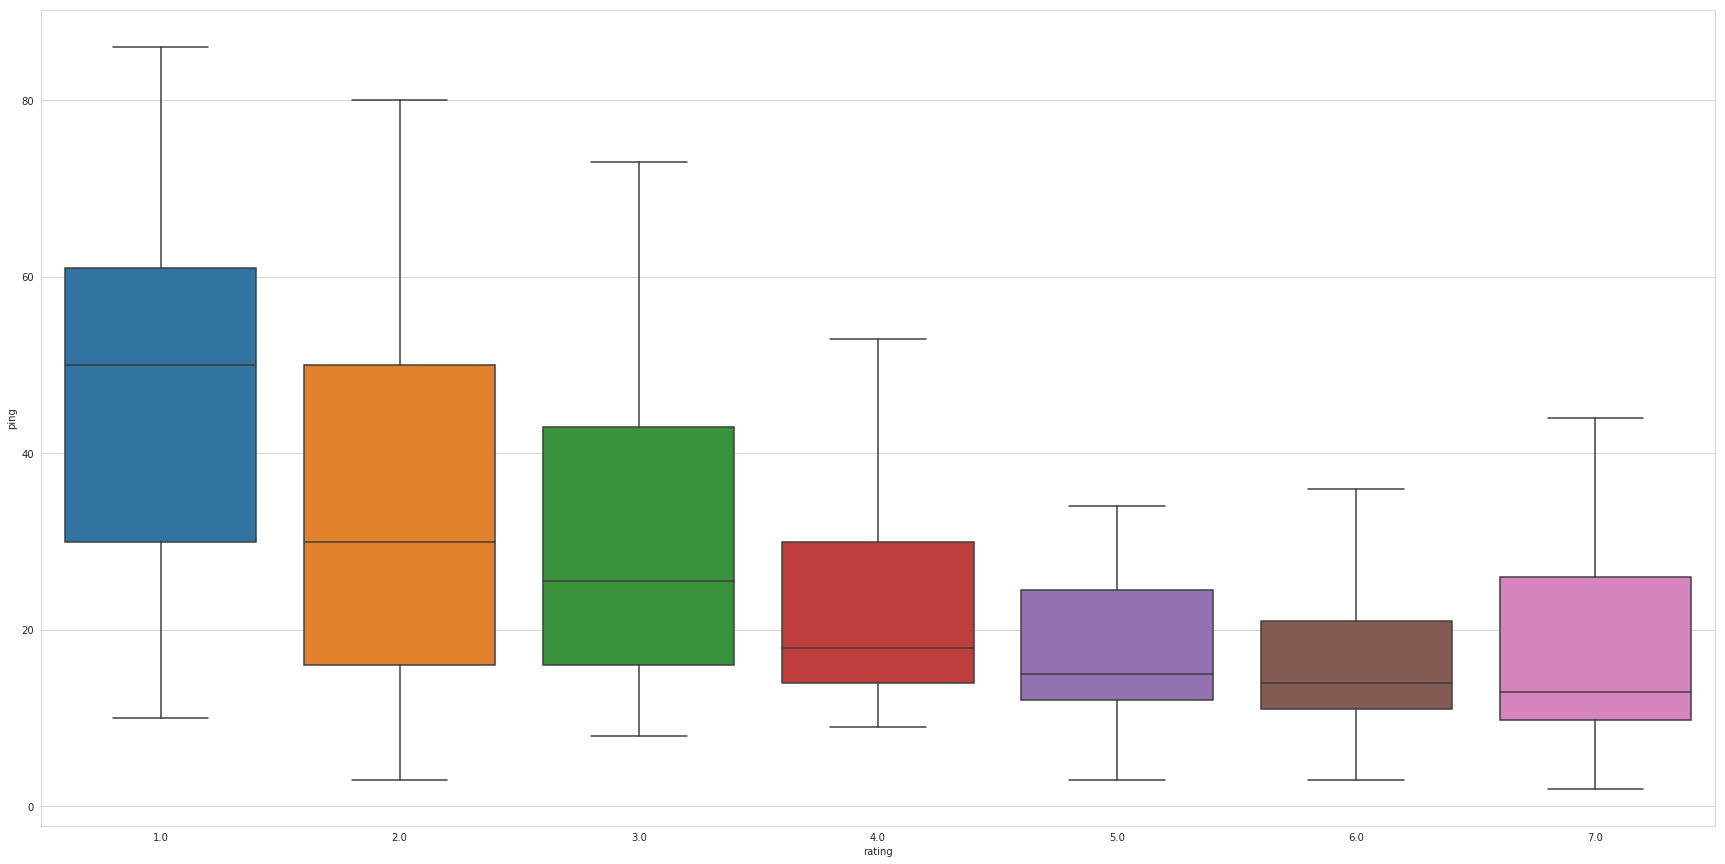

In [163]:
plt.figure(figsize=(30, 15))
ax = sns.boxplot(x='rating', y='ping', data=sua, showfliers=False)

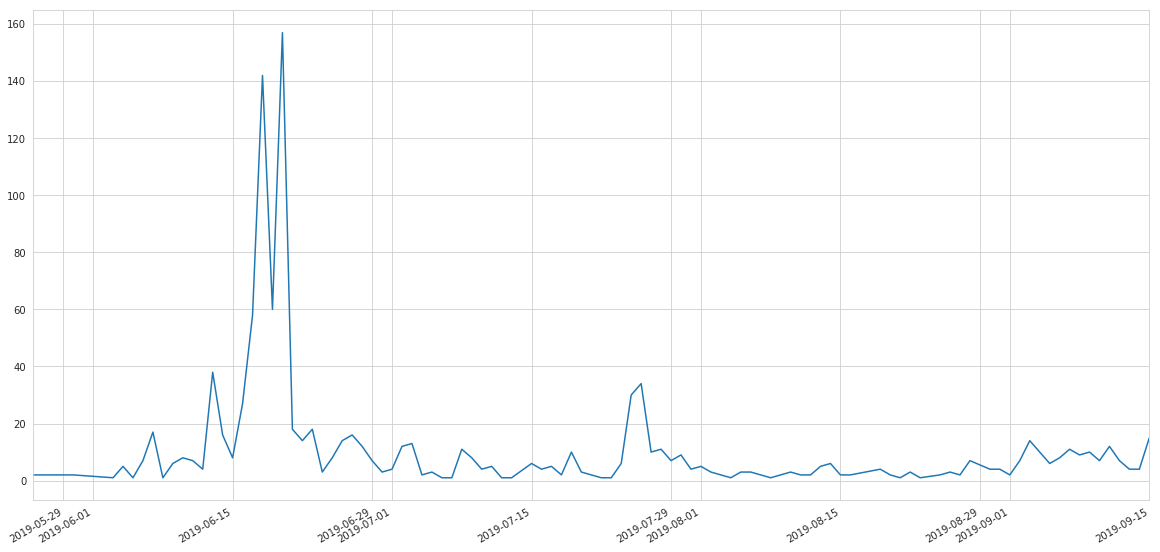

In [164]:
sua['test_datetime'] = pd.to_datetime(sua['test_date'])
by_date = sua['test_datetime'].value_counts()
by_date.plot(figsize=(20,10))